In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats

In [2]:
# initialize data
item_threshold = 1 # used to filter out user/artist pairs that have been 
                   #listened to less than the threshold number of times
popular_artist_fraction = 0.2 # top cutoff for what we consider popular artists, in this case the top 20%

user_events_file = '../data/user_events.txt'
low_user_file = '../data/low_main_users.txt'
medium_user_file = '../data/medium_main_users.txt'
high_user_file = '../data/high_main_users.txt'

In [3]:
#read in user events file
cols = ['user', 'artist', 'album', 'track', 'timestamp']
df_events = pd.read_csv(user_events_file, sep='\t', names=cols)
print('No. of user events: ' + str(len(df_events)))
df_events.head() # check it is all read in properly

No. of user events: 28718087


,user,artist,album,track,timestamp
0,31435741,2,4,4,1385212958
1,31435741,2,4,4,1385212642
2,31435741,2,4,4,1385212325
3,31435741,2,4,4,1385209508
4,31435741,2,4,4,1385209191


In [4]:
# create unique user-artist matrix
df_events = df_events.groupby(['user', 'artist']).size().reset_index(name='count')
print('No. user-artist pairs: ' + str(len(df_events)))
# each row contains a unique user-artist pair, along with how many times the
# user has listened to the artist
df_events.head()

No. user-artist pairs: 1755361


,user,artist,count
0,1021445,12,43
1,1021445,16,1
2,1021445,28,7
3,1021445,29,1
4,1021445,46,1


In [5]:
# filters out artist/user pairs who havent been listened two more than
# item_threshold amount of times to reduce
# kept mostly to 1 so we dont filter out any data currently
df_events = df_events[df_events['count'] >= item_threshold] 

# With 1, we see no difference between user-artist pairs here
print('No. filtered user-artist pairs: ' + str(len(df_events))) 

# here, we see the number of unique artists in our matrix
print('No. unique artists: ' + str(len(df_events['artist'].unique())))

No. filtered user-artist pairs: 1755361
No. unique artists: 352805


In [6]:
# get matrix where each row is a user-id and how many artists they've 
#listened to
user_dist = df_events['user'].value_counts() 

# counts how many unique users there are. prints out user id & a count of how 
# many rows they're included in, which effectively shows how many artists 
# they listen to
num_users = len(user_dist)
print('Mean artists of all users: ' + str(user_dist.mean()))
print('Min artists of all users: ' + str(user_dist.min()))
print('Max artists of all users: ' + str(user_dist.max()))



Mean artists of all users: 585.1203333333333
Min artists of all users: 18
Max artists of all users: 4011


In [8]:
# get artist distribution
# same as previous but with artists, shows artist-id and how many times they
# were listened to buy unique users
artist_dist = df_events['artist'].value_counts()
num_artists = len(artist_dist)
print('No. artists: ' + str(num_artists))
df_events['artist'].value_counts().head

No. artists: 352805


<bound method NDFrame.head of 135        1389
1602       1359
46         1325
320        1297
27         1290
           ... 
3124286       1
1029181       1
1023032       1
1008679       1
3087545       1
Name: artist, Length: 352805, dtype: int64>

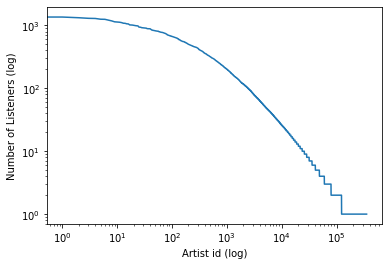

In [9]:
#plots x,y pairs of each row
# x is the artist id, y is the number of listeners 
# log both axes for feature scaling purposes
plot.plot(artist_dist.values)
plot.xlabel('Artist id (log)')
plot.ylabel('Number of Listeners (log)')
plot.xscale("log")
plot.yscale("log")

In [10]:
# get number of  popular artists
num_top_artists = int(popular_artist_fraction * num_artists)

# getting the top top_fraction (0.2) percent of artists, so finding how many
# artists make up 20% of total artists, and then only using the artists those
#number of the most popular aritsts
top_artist_dist = artist_dist[:num_top_artists]
print('No. top artists: ' + str(len(top_artist_dist)))

No. top artists: 70561


In [11]:
# read in users
# user file is just user_id and their mainstreaminess value 
low_users = pd.read_csv(low_user_file, sep=',').set_index('user_id')
medium_users = pd.read_csv(medium_user_file, sep=',').set_index('user_id')
high_users = pd.read_csv(high_user_file, sep=',').set_index('user_id')
no_users = len(low_users) + len(medium_users) + len(high_users)
print('No. of users: ' + str(no_users))

No. of users: 3000


In [12]:
low_users.head()

,M_global_R_APC
user_id,
20146143,-0.260074
32463394,-0.253610
47706954,-0.236572
19772905,-0.215595
21128139,-0.199496


In [55]:
# get popularity metrics
pop_count = [] # number of top items per user
user_hist = [] # user history sizes
pop_fraq = [] # relative number of top items per user
pop_artist_fraq = [] # average popularity of items in user profiles
low_profile_size = 0
low_gap = 0
medium_profile_size = 0
medium_gap = 0
high_profile_size = 0
high_gap = 0
low_count = 0
med_count = 0
high_count = 0
for u, df in df_events.groupby('user'):
    no_user_artists = len(set(df['artist'])) # profile size //number of artists in users profile
    # top items in profile //top percent of pop artists in users profile
    no_user_pop_artists = len(set(df['artist']) & set(top_artist_dist.index)) 
    pop_count.append(no_user_pop_artists) # adds users # of pop artists to a list 
    user_hist.append(no_user_artists) #sizes of users listening histories
    pop_fraq.append(no_user_pop_artists / no_user_artists) #fraction of pop items in profile / total items
    # get popularity (= fraction of users interacted with item) of user items and calculate average of it
    user_pop_artist_fraq = sum(artist_dist[df['artist']] / no_users) / no_user_artists
    pop_artist_fraq.append(user_pop_item_fraq)
    if u in low_users.index: # get user group-specific values
        low_profile_size += no_user_artists
        low_gap += user_pop_item_fraq
        low_count += 1
    elif u in medium_users.index:
        medium_profile_size += no_user_artists
        medium_gap += user_pop_item_fraq
        med_count += 1
    else:
        high_profile_size += no_user_artists
        high_gap += user_pop_item_fraq
        high_count += 1
low_profile_size /= len(low_users)
medium_profile_size /= len(medium_users)
high_profile_size /= len(high_users)
low_gap /= len(low_users) # average popularity of items/artists in low/med/high groups (gap = group average popularity)
medium_gap /= len(medium_users)
high_gap /= len(high_users)
print('Low count (for check): ' + str(low_count))
print('Med count (for check): ' + str(med_count))
print('High count (for check): ' + str(high_count))


Low count (for check): 1000
Med count (for check): 1000
High count (for check): 1000
Average LowMS profile size: 499.892
Average MedMS profile size: 715.669
Average HighMS profile size: 539.8


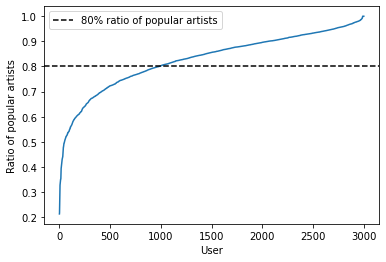

In [29]:
plot.figure()
plot.plot(sorted(pop_fraq))
plot.xlabel('User')
plot.ylabel('Ratio of popular artists')
plot.axhline(y=0.8, color='black', linestyle='--', label='80% ratio of popular artists')
plot.legend()

Text(0, 0.5, 'Number of popular artists')

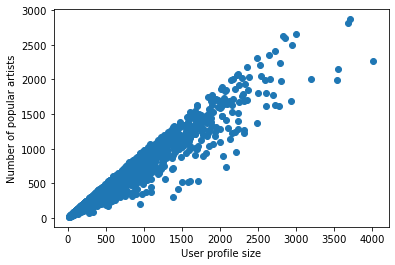

In [52]:
plot.figure()
plot.plot(user_hist, pop_count, 'o')
plot.xlabel('User profile size', )
plot.ylabel('Number of popular artists')

Text(0, 0.5, 'Average popularity of artists')

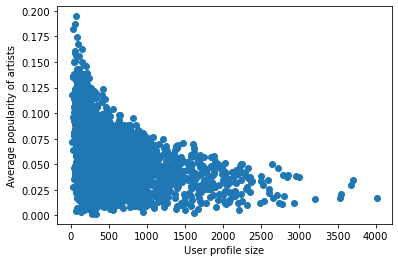

In [53]:
plot.figure()
line = slope * np.array(user_hist) + intercept
plot.plot(user_hist, pop_item_fraq, 'o')
plot.xlabel('User profile size')
plot.ylabel('Average popularity of artists')

In [54]:
print('Average LowMS profile size: ' + str(low_profile_size))
print('Average MedMS profile size: ' + str(medium_profile_size))
print('Average HighMS profile size: ' + str(high_profile_size))

Average LowMS profile size: 499.892
Average MedMS profile size: 715.669
Average HighMS profile size: 539.8
